## Dataset and Problem Introduction

In this analysis, we explore a survey on the most and least popular characters from [Star Wars.](https://en.wikipedia.org/wiki/Star_Wars)

Data Source: https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/
<br>Reference: https://dataquest.io/

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

# We need to specify the "ISO-8859-1" encoding because the data set has some characters that aren't in Python's default "utf-8" encoding.
star_wars = pd.read_csv("datasets/star_wars.csv", encoding="ISO-8859-1")
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Data Dictionary
* **`RespondentID`** : An anonymized ID for the respondent (person taking the survey)
* **`Gender`** : The respondent's gender
* **`Age`** : The respondent's age
* **`Household Income`** : The respondent's income
* **`Education`** : The respondent's education level
* **`Location (Census Region)`** : The respondent's location
* **`Have you seen any of the 6 films in the Star Wars franchise?`** : Has a Yes or No response
* **`Do you consider yourself to be a fan of the Star Wars film franchise?`** : Has a Yes or No response

## Data Cleaning

* **'RespondentID'** remove NaN values.
* Value conversion:
    * Columns like **'Have you seen any of the 6 films in the Star Wars franchise?'** and **'Do you consider yourself to be a fan of the Star Wars film franchise?'**  are string type, because the main values they contain are 'Yes' and 'No'. We convert them to a Boolean having only the values True, False, and NaN.
    * Columns **'Which of the following Star Wars films have you seen? Please select all that apply.'** to **'Unnamed: 8'** are object type. We convert each of these columns to Boolean 'True' and 'False' values.
* Rename columns:
    * The names of columns **'Which of the following Star Wars films have you seen? Please select all that apply.'** to **'Unnamed: 8'** need to be more intuitive, the same case with columns from **'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.'** to **'Unamed: 14'** and columns from **'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.'** to **'Unnamed: 28'**.
    
* We remove the strange Characters from **'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦'**

In [16]:
characters = star_wars.iloc[0, 15:29].values.tolist()
characters

['Han Solo',
 'Luke Skywalker',
 'Princess Leia Organa',
 'Anakin Skywalker',
 'Obi Wan Kenobi',
 'Emperor Palpatine',
 'Darth Vader',
 'Lando Calrissian',
 'Boba Fett',
 'C-3P0',
 'R2 D2',
 'Jar Jar Binks',
 'Padme Amidala',
 'Yoda']

In [17]:
# Remove any rows where RespondentID is NaN
star_wars = star_wars[star_wars['RespondentID'].notnull()]


#characters = star_wars.iloc[0, 15:29].values.tolist()
# Renaming columns related to the question 'Which of the following Star Wars films have you seen?'
i_saw_it = {"Which of the following Star Wars films have you seen? Please select all that apply.": "I saw Star Wars: Episode I  The Phantom Menace",
        "Unnamed: 4": "I saw Star Wars: Episode II  Attack of the Clones",
        "Unnamed: 5": "I saw Star Wars: Episode III  Revenge of the Sith",
        "Unnamed: 6": "I saw Star Wars: Episode IV  A New Hope",
        "Unnamed: 7": "I saw Star Wars: Episode V The Empire Strikes Back",
        "Unnamed: 8": "I saw Star Wars: Episode VI Return of the Jedi"}
star_wars.rename(columns=i_saw_it,inplace=True)

# Renaming columns related to the question 'Please rank the Star Wars films in order of preference
# with 1 being your favorite film in the franchise and 6 being your least favorite film.'    
ranking = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "Star Wars: Episode I  The Phantom Menace rank",
        "Unnamed: 10": "Star Wars: Episode II  Attack of the Clones rank",
        "Unnamed: 11": "Star Wars: Episode III  Revenge of the Sith rank",
        "Unnamed: 12": "Star Wars: Episode IV  A New Hope rank",
        "Unnamed: 13": "Star Wars: Episode V The Empire Strikes Back rank",
        "Unnamed: 14": "Star Wars: Episode VI Return of the Jedi rank"}
star_wars.rename(columns=ranking,inplace=True)

# Renaming columns related to the question 'Please state whether you view the following characters 
#favorably, unfavorably, or are unfamiliar with him/her.
star_wars_characters = dict(zip(star_wars.columns[15:29],characters))
star_wars.rename(columns=star_wars_characters,inplace=True)

# remove strange characters from 'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦
star_wars.columns = star_wars.columns.str.replace('ÂÃ¦','')


# define a function that update the value to True if the value is the name of the movie, False if the value is None.
def update_val(val):
    if val in ["Star Wars: Episode I  The Phantom Menace",
        "Star Wars: Episode II  Attack of the Clones",
        "Star Wars: Episode III  Revenge of the Sith",
        "Star Wars: Episode IV  A New Hope",
        "Star Wars: Episode V The Empire Strikes Back",
        "Star Wars: Episode VI Return of the Jedi"]:
        return True
    else:
        return False

# apply the update_val element-wise on columns from position 3 to 8.    
star_wars[star_wars.columns[3:9]] = star_wars[star_wars.columns[3:9]].applymap(update_val)


# define a function that change 'Yes' to 'True' and 'No' to 'False'.
def yes_no(val):
    if val == "Yes":
        return True
    elif val == "No":
        return False

# apply the function yes_no element-wise on columns with position 1,2,30,31 and 32.    
star_wars[star_wars.columns[[1,2,30,31,32]]] = star_wars[star_wars.columns[[1,2,30,31,32]]].applymap(yes_no)

## Data Analysis
The respondents were asked to rank the Star Wars movies in order of least favourite to most favourite, with 1 meaning the film was the most favourite, and 6 meaning it was the least favourite. 

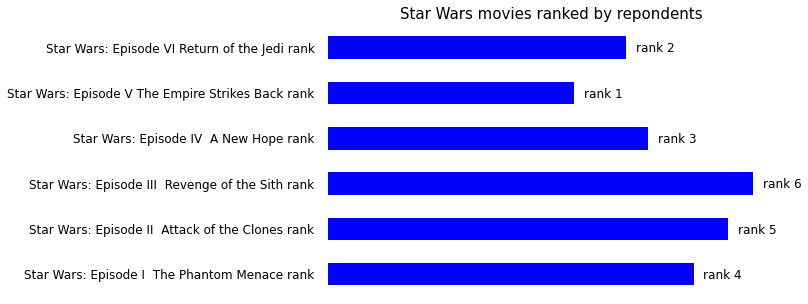

In [18]:
# find the mean of each of the ranking columns
ranking = star_wars[star_wars.columns[9:15]].astype(float).mean(axis=0)
# visualization 
fig , ax = plt.subplots(figsize=[8,5])
ax = star_wars[star_wars.columns[9:15]].astype(float).mean(axis=0).plot.barh(color='blue')
# remove x ticks labels
ax.set_xticks([])
# remove spines
for key,spine in ax.spines.items():
    spine.set_visible(False)    
# set title
ax.set_title('Star Wars movies ranked by repondents',size=15)
# remove y ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
# add padding between axes and labels set y label size
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10,labelsize=12)
# annotation
for p, q in zip(ax.patches, ranking.index.values.tolist()):
    ax.text(p.get_width()+.1,p.get_y()+p.get_height()/2-.1,'rank '+str(ranking.sort_values(ascending=True).index.values.tolist().index(q)+1),size=12)


In general, fans seem to prefer the original trilogy of the cinematic saga of Star Wars which consists of "A New Hope (1977)", "The Empire Strikes Back (1980)" and "Return of the Jedi (1983)". `"Star Wars: Episode V The Empire Strikes Back"` is considered by the respondents to be the best film in the saga.

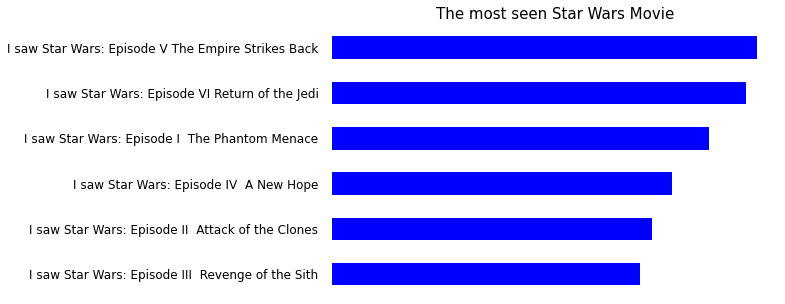

In [19]:
fig,ax = plt.subplots(figsize=[8,5])
ax = star_wars[star_wars.columns[3:9]].sum(axis=0).sort_values().plot.barh(color='blue')
# remove spines
for key,spine in ax.spines.items():
    spine.set_visible(False) 
# remove x ticks labels
ax.set_xticklabels([])
# set title
ax.set_title('The most seen Star Wars Movie',size=15)
# remove x,y Ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
# add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10,labelsize=12)

`"Star Wars: Episode V The Empire Strikes Back"` is the most seen Star Wars movie by the respondents. In general, the results correlate positively with the ranking, the more the movie is popular, the more it is watched.

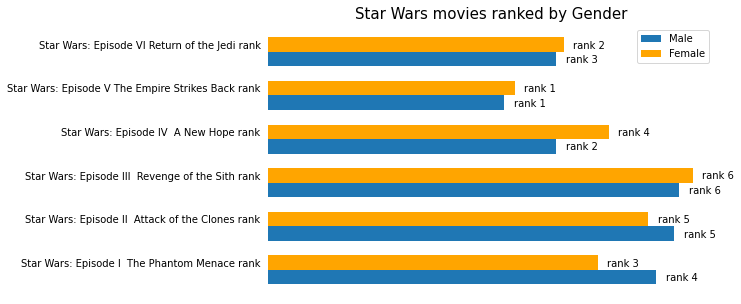

In [20]:
# star wars movies names
sw_movies_rank = star_wars.columns[9:15]
# male's preferences
male_preference = star_wars.loc[star_wars["Gender"] == "Male",sw_movies_rank].astype(float).mean()
# female's preferences
female_preference = star_wars.loc[star_wars["Gender"] == "Female",sw_movies_rank].astype(float).mean()

# visualization :
fig,ax = plt.subplots(figsize=[8,5])

y_index = np.array([0,1.5,3,4.5,6,7.5])
height = .5
# plotting male_preference 
m = ax.barh(y_index ,male_preference,height)
# plotting female_preference 
f= ax.barh(y_index+height ,female_preference,height,color='orange')
# set y axis ticks and labels
ax.set_yticks(y_index+.5)
ax.set_yticklabels(labels=sw_movies_rank.values)
# remove spines
for key,spine in ax.spines.items():
    spine.set_visible(False) 
# remove x,y Ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
# remove x ticks labels
ax.set_xticklabels([])
# set title
ax.set_title('Star Wars movies ranked by Gender',size=15)
# legend
ax.legend((m, f), ('Male', 'Female'))
# annotation_male
for p, q in zip(m.patches, male_preference.index.values.tolist()):
    ax.text(p.get_width()+.1,p.get_y()+p.get_height()/2-.13,'rank '+str(male_preference.sort_values(ascending=True).index.values.tolist().index(q)+1),size=10)
# annotation_female
for p, q in zip(f.patches, female_preference.index.values.tolist()):
    ax.text(p.get_width()+.1,p.get_y()+p.get_height()/2-.13,'rank '+str(female_preference.sort_values(ascending=True).index.values.tolist().index(q)+1),size=10)

`"Episode V: The Empire Strikes Back"` is the most popular Star Wars film among female and male fans. Men rated the three original movies at the top of their favourite Star Wars films while only two of the original movies were highly rated by women, they considered `" Episode I: The Phantom Menace 1999"` to be more popular than `"Episode IV: A New Hope 1977"`.

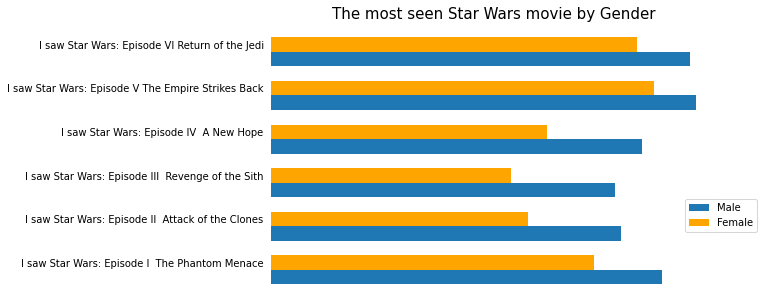

In [21]:
seen = star_wars.columns[3:9]
seen_movie_by_male = star_wars.loc[star_wars["Gender"] == "Male",seen].astype(float).sum()
seen_movie_by_female = star_wars.loc[star_wars["Gender"] == "Female",seen].astype(float).sum()

fig,ax = plt.subplots(figsize=[8,5])

y_index = np.array([0,1.5,3,4.5,6,7.5])
height = .5

m = ax.barh(y_index ,seen_movie_by_male,height)
f= ax.barh(y_index+height ,seen_movie_by_female,height,color='orange')
# set y axis ticks and labels
ax.set_yticks(y_index+.5)
ax.set_yticklabels(labels=seen.values)
# remove spines
for key,spine in ax.spines.items():
    spine.set_visible(False) 
# remove x,y Ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
# remove x ticks labels
ax.set_xticklabels([])
# set title
ax.set_title('The most seen Star Wars movie by Gender',size=15)
# set legend
ax.legend((m, f), ('Male', 'Female'),loc='center right',bbox_to_anchor=(1.1, 0.3))

Star Wars movies are more popular among men than women, `"Episode V The Empire Strikes Back"` is the most watched Star Wars movie among both of men and women.

Text(0.5, 1.0, 'Education level for Star Wars fans who responded to the survey')

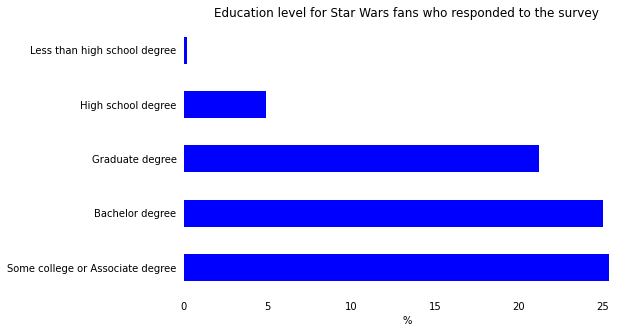

In [22]:
fig,ax = plt.subplots(figsize=[8,5])

ax= (star_wars.loc[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == True,'Education'].value_counts()*100/552).plot.barh(color='blue')

# remove spines
for key,spine in ax.spines.items():
    spine.set_visible(False) 
# remove x,y Ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
# set x axis label
ax.set_xlabel('%')
# set title
ax.set_title('Education level for Star Wars fans who responded to the survey',size=12)

95% of the Star Wars fans who respond to the survey have more than a High school degree.

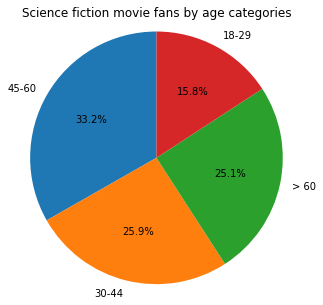

In [23]:
geek=(star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == True) & (star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==True)

fig,ax = plt.subplots(figsize=[5,5])
ax= (star_wars.loc[geek,'Age'].value_counts()*100/geek.astype(int).sum()).plot.pie(autopct='%1.1f%%',explode=[0,0,0,0], startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_ylabel('')
ax.set_title('Science fiction movie fans by age categories').set_position([.5, 1.05])

About 25% of science fiction movie fans are over the age of 60. It seems that the old prefer science fiction films more than the young.

Text(0.5, 1.0, 'Characters popularity')

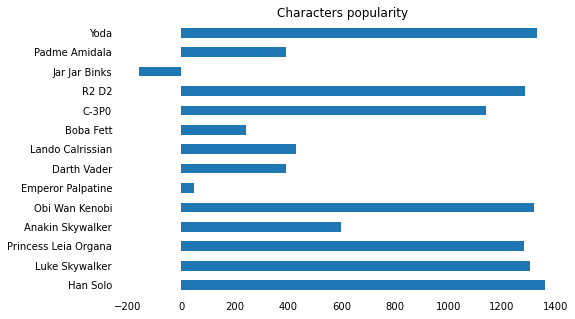

In [24]:
characters = star_wars[star_wars.columns[15:29]]

# create a function that converts the respondent's point of view towards a star wars character to a score ranging from -2 to 2.
def update_val(val):
    if val=='Very favorably':
        return 2
    elif val=='Somewhat favorably':
        return 1
    elif val in ['Neither favorably nor unfavorably (neutral)' , 'Unfamiliar (N/A)',np.nan]:
        return 0
    elif val == 'Very unfavorably':
        return -2
    elif val == 'Somewhat unfavorably':
        return -1
# apply the update_val element-wise on columns with position 15 to 28.    
characters = characters.applymap(update_val)

fig,ax = plt.subplots(figsize=[8,5])

ax= characters.sum(axis=0).plot.barh()

# remove spines
for key,spine in ax.spines.items():
    spine.set_visible(False) 
# remove x,y Ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
# set title
ax.set_title('Characters popularity',size=12)

'Yoda' and 'Han Solo' are the respondents' favourite characters, in contrast 'Jar Jar Binks' is the least popular among the characters.

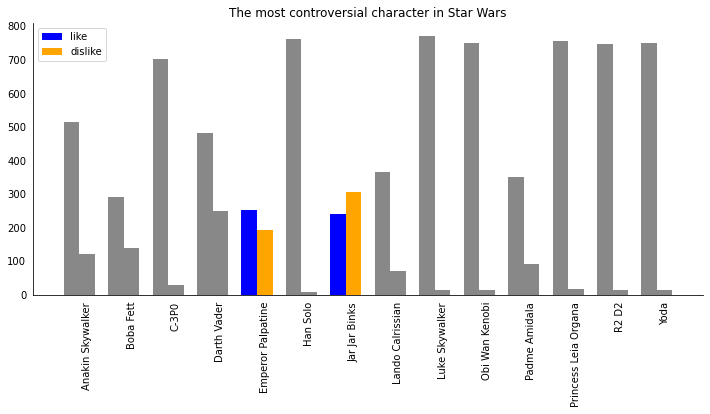

In [25]:
# create a function that converts scores into likes, dislikes and neutral.
def like_dislike(val):
    if val > 0 :
        return 'like'
    elif val < 0 :
        return 'dislike'
    elif val == 0:
        return 'neutral'
# apply the like_dislike element-wise on columns with position 15 to 29.    
characters = characters.applymap(like_dislike)

# Unpivot the DataFrame characters from wide to long format
melted = characters.melt()
# excluding 'neutral' values
melted = melted[melted['value']!='neutral']

# Visualisation
import matplotlib.pyplot as plt
from matplotlib import colors

fig,ax=plt.subplots(figsize=(12,5))

# keeping only the 'like' value and group by characters
like = melted[melted['value']=='like'].groupby('variable').size()
# keeping only the 'dislike' value and group by characters
dislike = melted[melted['value']=='dislike'].groupby('variable').size()
# set the x axis ticks index
ind = np.arange(1,15) 
# set the width of bars
width = 0.35       

like_bars = ax.bar(ind - width/2, like, width,label='like',color='blue')
dislike_bars = ax.bar(ind + width/2 , dislike, width,label='dislike',color='orange')
# set legend
ax.legend(loc='upper left')
# set x axis ticks labels
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(like.index,rotation=90)
# ax.set_title
ax.set_title('The most controversial character in Star Wars')
# remove spines
for key,spine in ax.spines.items():
    if key in ['top','right']:
        spine.set_visible(False)  
# remove x,y Ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
# ax.tick_params(axis='x', rotation=45)
# make colors in the barplot stand out for 'Jar Jar Binks' and 'Emperor Palpatine'
for charac in characters.columns:
    if charac not in ['Jar Jar Binks','Emperor Palpatine']:
        pos_dislike = dislike.index.get_loc(charac)
        pos_like = dislike.index.get_loc(charac)        
        like_bars.patches[pos_like].set_facecolor('#888888')
        dislike_bars.patches[pos_dislike].set_facecolor('#888888')

'Jar Jar Binks' is the most controversial character and is recognized as one of the most hated characters in Star Wars.

In [26]:
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
fans = fans[fans["Location (Census Region)"].notnull()]
print('Geographic Distribution of Star Wars Fans')
fans["Location (Census Region)"].value_counts(dropna=False)

Geographic Distribution of Star Wars Fans


South Atlantic        88
Pacific               86
East North Central    84
Middle Atlantic       64
West North Central    53
West South Central    53
Mountain              49
New England           44
East South Central    20
Name: Location (Census Region), dtype: int64

In [27]:
regions = { "sa_states" : ["DE", "MD", "VA", "WV", "NC", "SC", "GA", "FL", "DC"],
            "pacific" : ["AK", "CA", "HI", "OR", "WA"],
            "enc" : ["IL", "IN", "MI", "OH", "WI"],
            "mid_atl" : ["NJ", "NY", "PA"],
            "wsc" : ["AR", "LA", "OK", "TX"],
            "wnc" : ["IA", "KS", "MN", "MO", "NE", "ND", "SD"],
            "mountain" : ["AZ", "CO", "ID", "MT", "NV", "NM", "UT", "WY"],
            "ne" : ["ME", "VT", "NH", "MA", "CT", "RI"],
            "esc" : ["AL", "KY", "MS", "TN"],
          }

states = {}

def state_calc():
    for region in regions:
        if region == "sa_states":
            for state in regions[region]:
                states[state] = round(88 / len(regions[region]))
        elif region == "pacific":
            for state in regions[region]:
                states[state] = round(86 / len(regions[region]))
        elif region == "enc":
            for state in regions[region]:
                states[state] = round(84 / len(regions[region]))
        elif region == "mid_atl":
            for state in regions[region]:
                states[state] = round(64 / len(regions[region]))
        elif region == "wsc":
            for state in regions[region]:
                states[state] = round(53 / len(regions[region]))
        elif region == "wnc":
            for state in regions[region]:
                states[state] = round(53 / len(regions[region]))
        elif region == "mountain":
            for state in regions[region]:
                states[state] = round(49 / len(regions[region]))
        elif region == "ne":
            for state in regions[region]:
                states[state] = round(44 / len(regions[region]))
        elif region == "esc":
            for state in regions[region]:
                states[state] = round(20 / len(regions[region]))
                
state_calc()

df = pd.DataFrame.from_dict(states, orient="index", columns=["fans"])
df.reset_index(inplace=True)
df.rename({"index": "code"}, axis=1, inplace=True)

fig = go.Figure(data = go.Choropleth(
                                    locations = df["code"],
                                    z = df['fans'],
                                    locationmode = 'USA-states',
                                    colorscale = 'Bugn',
                                    colorbar_title = "Fans per state",
                                    )
               )

fig.update_layout(
                    title_text = 'Distribution of Star Wars Fans by States on Average',
                    geo_scope='usa'
                 )
fig.write_html("interactive_map.html")
print('Interactive Location Map:')
fig.show()

Interactive Location Map:


## Conclusion:
* In general, fans seem to prefer the original trilogy of the cinematic saga Star Wars which consists of "A New Hope (1977)", "The Empire Strikes Back (1980)" and "Return of the Jedi (1983)" more than the rest of the collection. 
* "Star Wars: Episode V The Empire Strikes Back" is considered by the respondents to be the best film in the saga hence it makes it the most seen Star Wars movie by the fans.
* Men rated the three original movies at the top of their favourite Star Wars films while only two of the original movies were highly rated by women, they considered "Episode I: The Phantom Menace 1999" more popular than "Episode IV: A New Hope 1977".
* 95% of the Star Wars fans who respond to the survey have more than a high school degree. 
* It seems that the old prefer science fiction films more than the young.
* 'Yoda' and 'Han Solo' are the respondents' favourite characters, in contrast 'Jar Jar Binks' is the least popular among the characters.
* Jar Jar Binks' is the most controversial character and is recognized as one of the most hated characters in Star Wars.
* Most of the Star Wars fans who responded to the survey are located in the South Atlantic states, the East North Central, the Pacific and the Middle Atlantic.